In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
workbook = 'netflix_titles.csv'
df =pd.read_csv(workbook, index_col='title')
#df.info()
df

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,,
Norm of the North: King Sized Adventure,81145628,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
Jandino: Whatever it Takes,80117401,Movie,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
Transformers Prime,70234439,TV Show,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
Transformers: Robots in Disguise,80058654,TV Show,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
#realityhigh,80125979,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...
Red vs. Blue,80000063,TV Show,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
Maron,70286564,TV Show,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
Little Baby Bum: Nursery Rhyme Friends,80116008,Movie,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...


In [3]:
Time = df['duration'].str.split(" ",expand = True)
Time.columns=['Duration','min/Season']
df= pd.concat([df,Time], axis =1)
df['country'].fillna(value='Not Available',inplace=True)
df['country'].isnull().sum()

0

In [4]:
blank = df.isnull().sum()/len(df)*100

Text(0, 0.5, 'Missing Percentage')

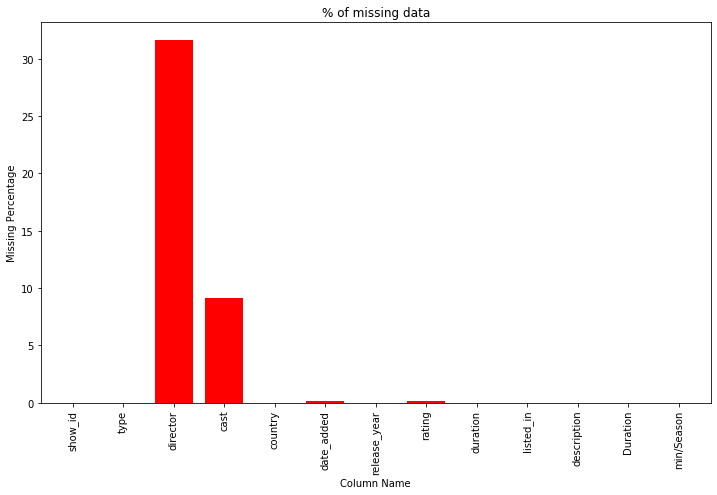

In [5]:
blank.plot.bar(figsize=(12,7),color='r',width=0.75)
plt.title("% of missing data")
plt.xlabel('Column Name')
plt.ylabel('Missing Percentage')

In [6]:
df.columns

Index(['show_id', 'type', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Duration', 'min/Season'],
      dtype='object')

Movie      4265
TV Show    1969
Name: type, dtype: int64


Text(0.5, 1.0, 'Share of Movies vs Tv Show')

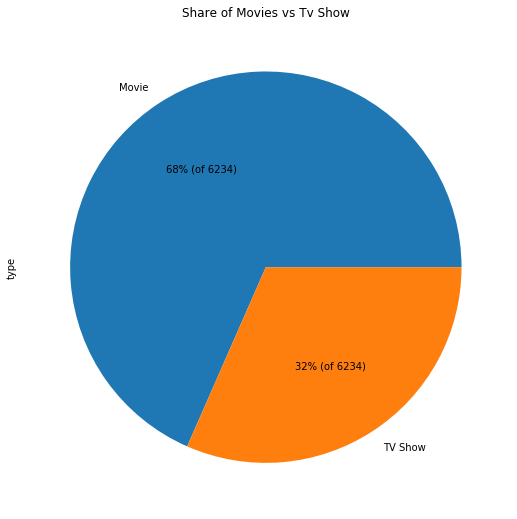

In [7]:
show_type =df['type'].value_counts()
print(show_type)
#percent_movie = round(show_type[0]/(show_type[0:2].sum()),2)
#percent_tvshow = round(show_type[1]/(show_type[0:2].sum()),2)
show_type.plot.pie(figsize=(9,9),autopct='%1.f%% (of 6234)')
plt.title('Share of Movies vs Tv Show')
#plt.legend(['% Movie '+ str(percent_movie*100),' % Tv Shows ' + str(percent_tvshow*100) ])

In [8]:
df_m = df[df['type'] == 'Movie']
df_tv = df[df['type'] == 'TV Show']

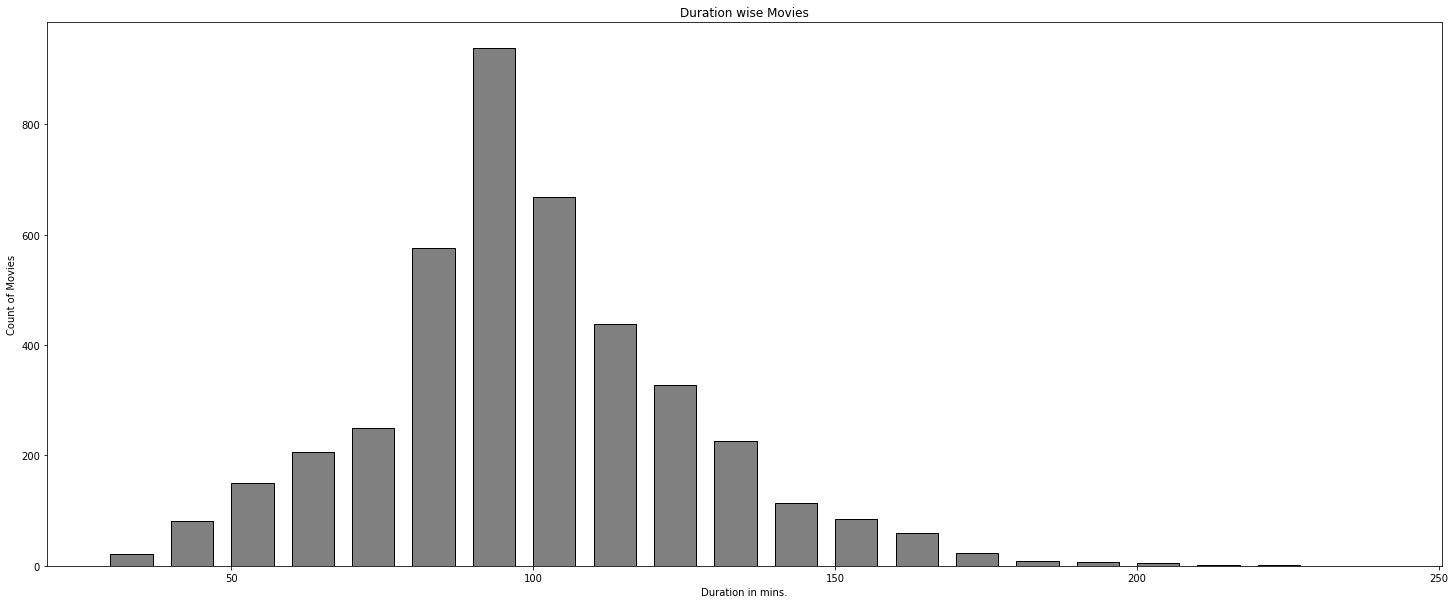

(array([ 21.,  82., 150., 207., 250., 575., 938., 668., 438., 327., 227.,
        113.,  85.,  59.,  24.,   9.,   6.,   5.,   1.,   2.,   0.]),
 array([ 30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150,
        160, 170, 180, 190, 200, 210, 220, 230, 240]),
 <a list of 21 Patch objects>)

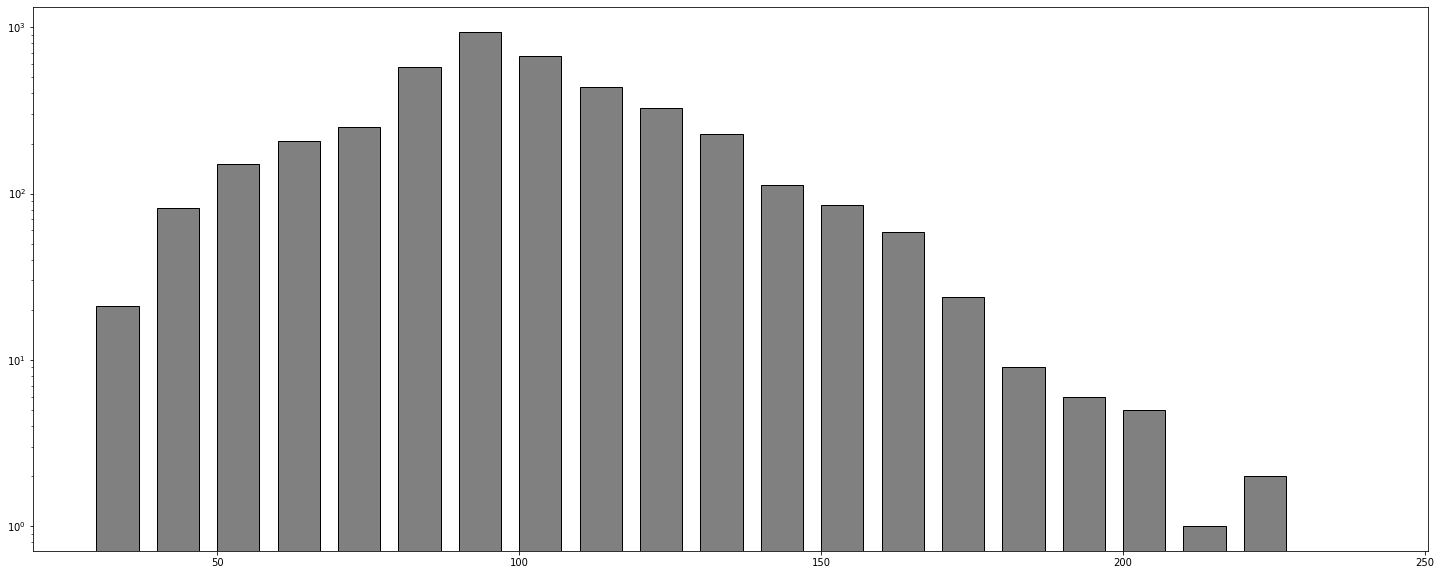

In [9]:
rng = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240]
plt.figure(figsize=(25,10))
plt.hist(df_m['Duration'].astype('float'),bins = rng, edgecolor = 'black',color='grey',width=7)
plt.title('Duration wise Movies')
plt.xlabel('Duration in mins.')
plt.ylabel('Count of Movies')
plt.show()
plt.figure(figsize=(25,10))
plt.hist(df_m['Duration'].astype('float'),bins = rng, edgecolor = 'black',color='grey',width=7,log=True)

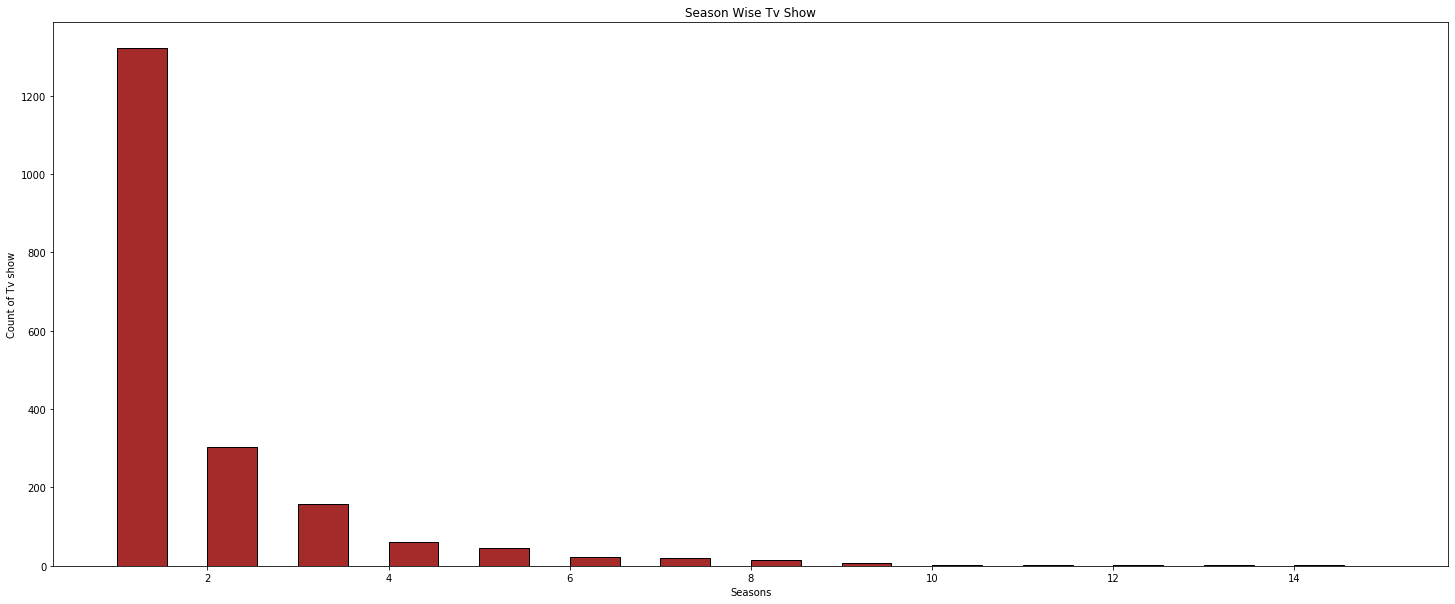

Text(0, 0.5, 'Count of Tv show')

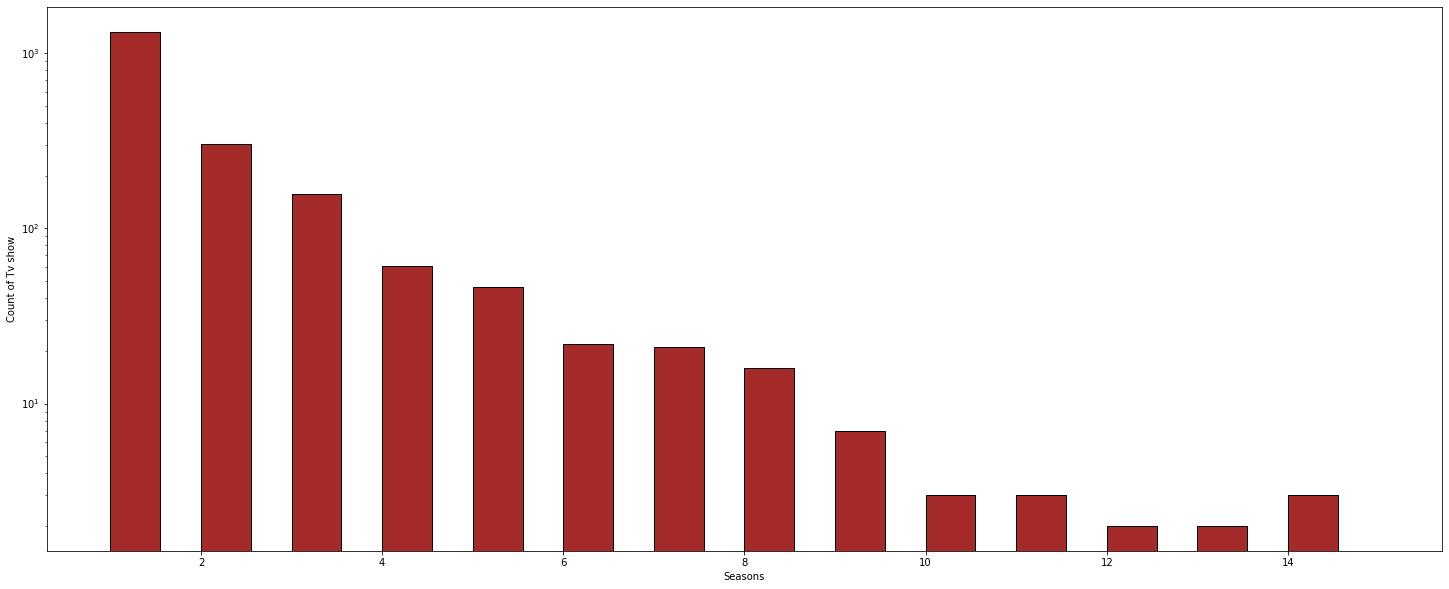

In [10]:
rng2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure(figsize=(25,10))
plt.hist(df_tv['Duration'].astype('float'),bins = rng2, edgecolor = 'black',color='brown',width=0.55)
plt.title("Season Wise Tv Show")
plt.xlabel('Seasons')
plt.ylabel('Count of Tv show')
plt.show()
plt.figure(figsize=(25,10))
plt.hist(df_tv['Duration'].astype('float'),bins = rng2, edgecolor = 'black',color='brown',width=0.55,log=True)
plt.xlabel('Seasons')
plt.ylabel('Count of Tv show')


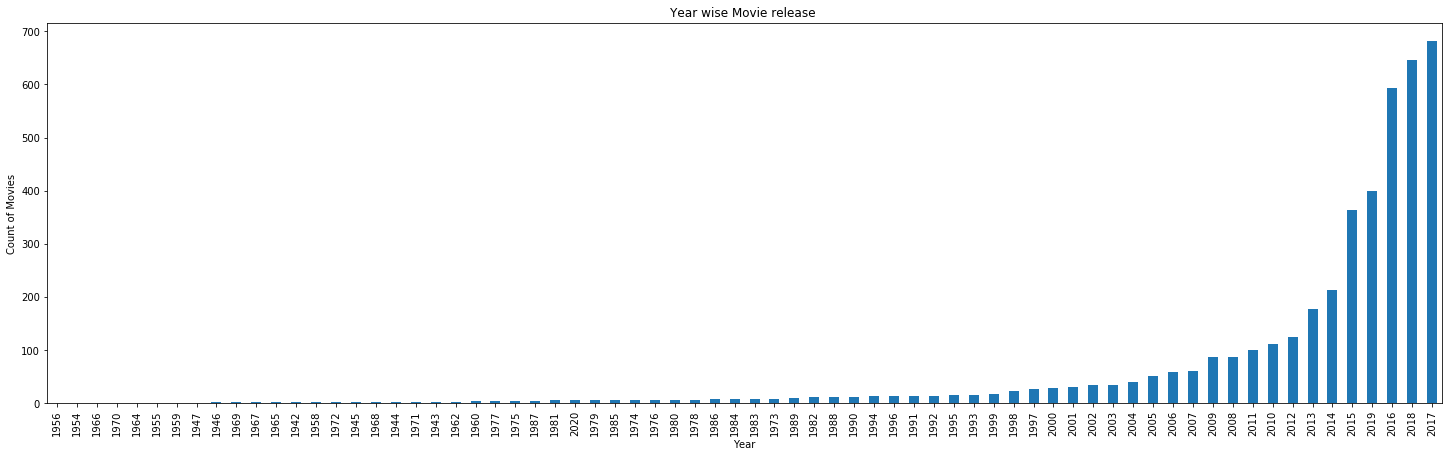

Text(0, 0.5, 'Count of Movies')

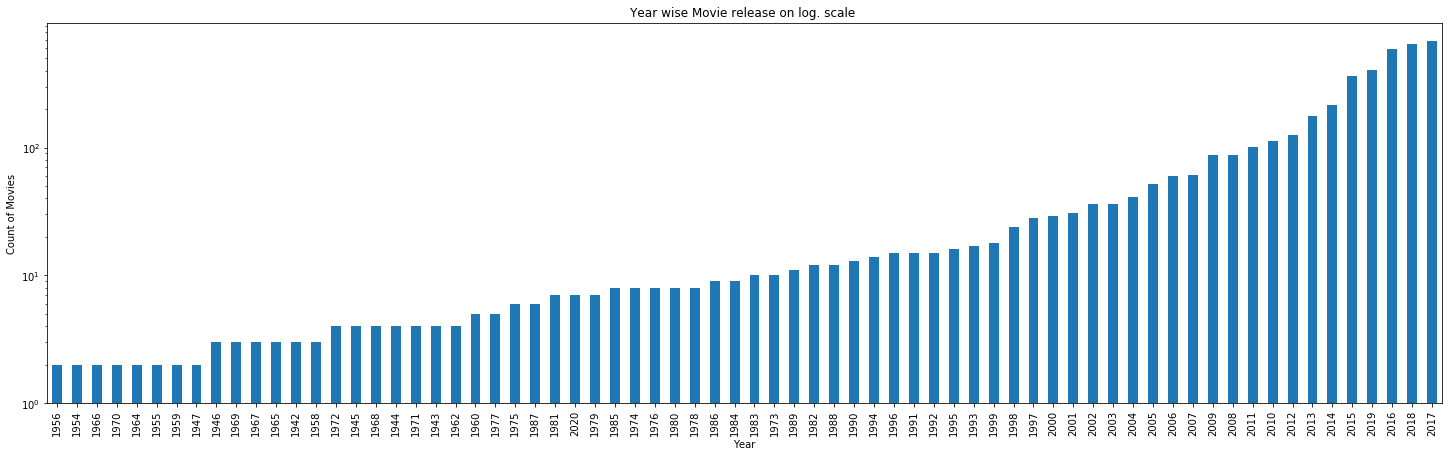

In [11]:
year = df_m['release_year'].astype('int').value_counts().sort_values()
year.plot.bar(figsize=(25,7))
plt.title('Year wise Movie release ')
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.show()
year.plot.bar(figsize=(25,7),log=True)
plt.title('Year wise Movie release on log. scale ')
plt.xlabel('Year')
plt.ylabel('Count of Movies')

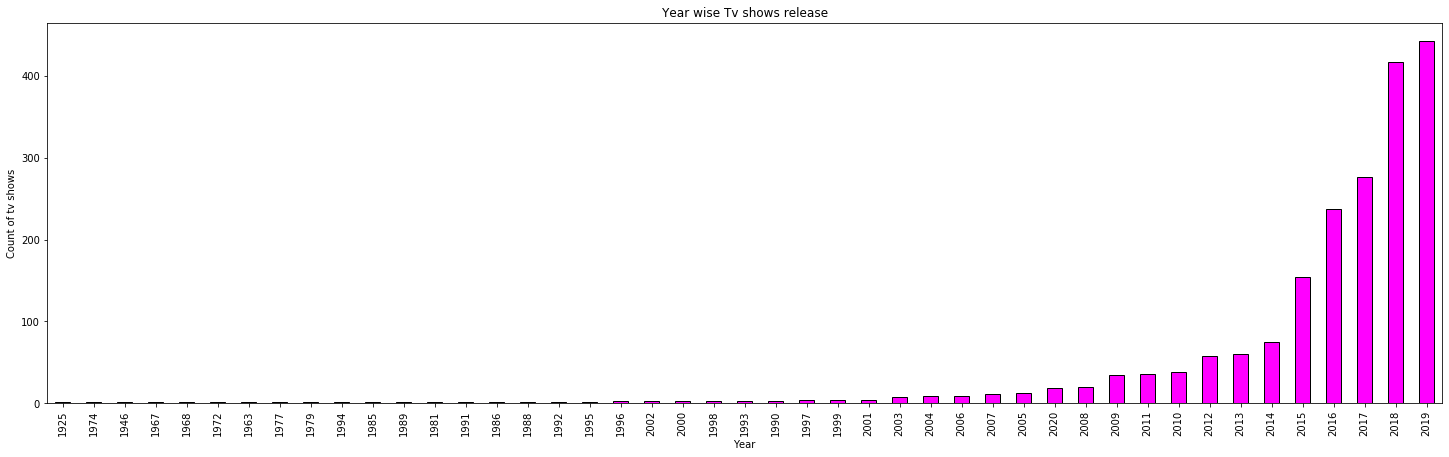

Text(0, 0.5, 'Count of tv shows')

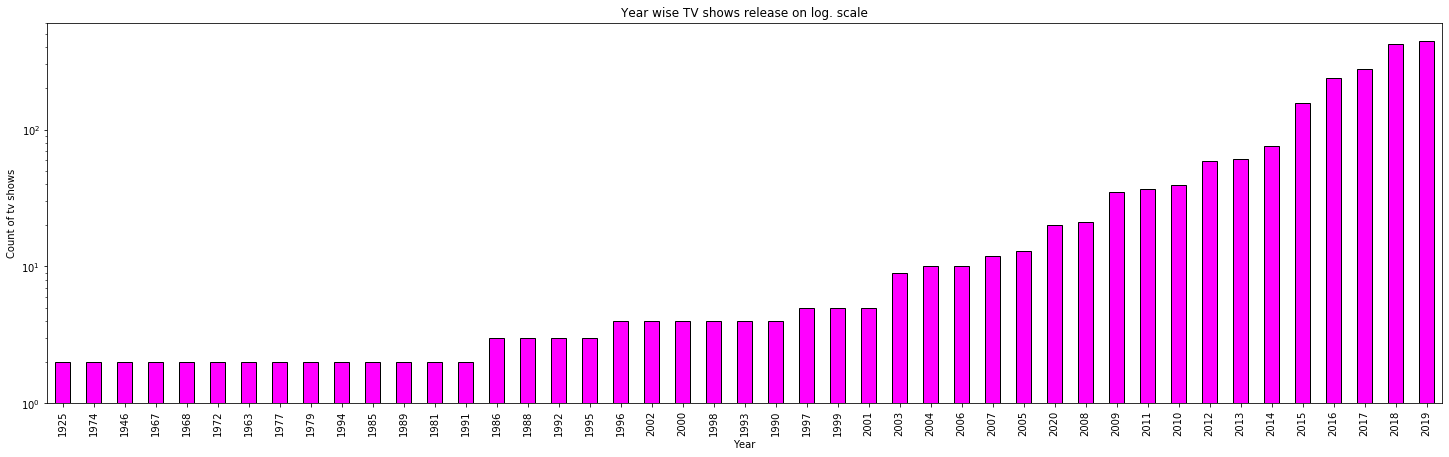

In [12]:
year = df_tv['release_year'].astype('int').value_counts().sort_values()
year.plot.bar(figsize=(25,7),color='magenta',edgecolor='black')
plt.title('Year wise Tv shows release')
plt.xlabel('Year')
plt.ylabel('Count of tv shows')
plt.show()
year.plot.bar(figsize=(25,7),log=True,color='magenta',edgecolor='black')
plt.title('Year wise TV shows release on log. scale')
plt.xlabel('Year')
plt.ylabel('Count of tv shows')

In [13]:
df_m.columns

Index(['show_id', 'type', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Duration', 'min/Season'],
      dtype='object')

In [14]:
cnt_country = Counter()
for item in df_m['country']:
    cnt_country.update(str(item).split(", "))
#print(cnt_country)

In [15]:
Cntry=[]
rng3 =[]
for response in cnt_country.most_common(11):
    Cntry.append(response[0])
    rng3.append(response[1])
#Cntry.remove('nan')
#rng3.remove(195)
Cntry
#Cntry= Cntry.reverse()
#rng3 = rng3.reverse
print(Cntry,rng3)

['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Not Available', 'Spain', 'Germany', 'Hong Kong', 'China', 'Mexico'] [1923, 783, 378, 211, 201, 195, 133, 126, 93, 84, 84]


Text(0.5, 0, 'Country')

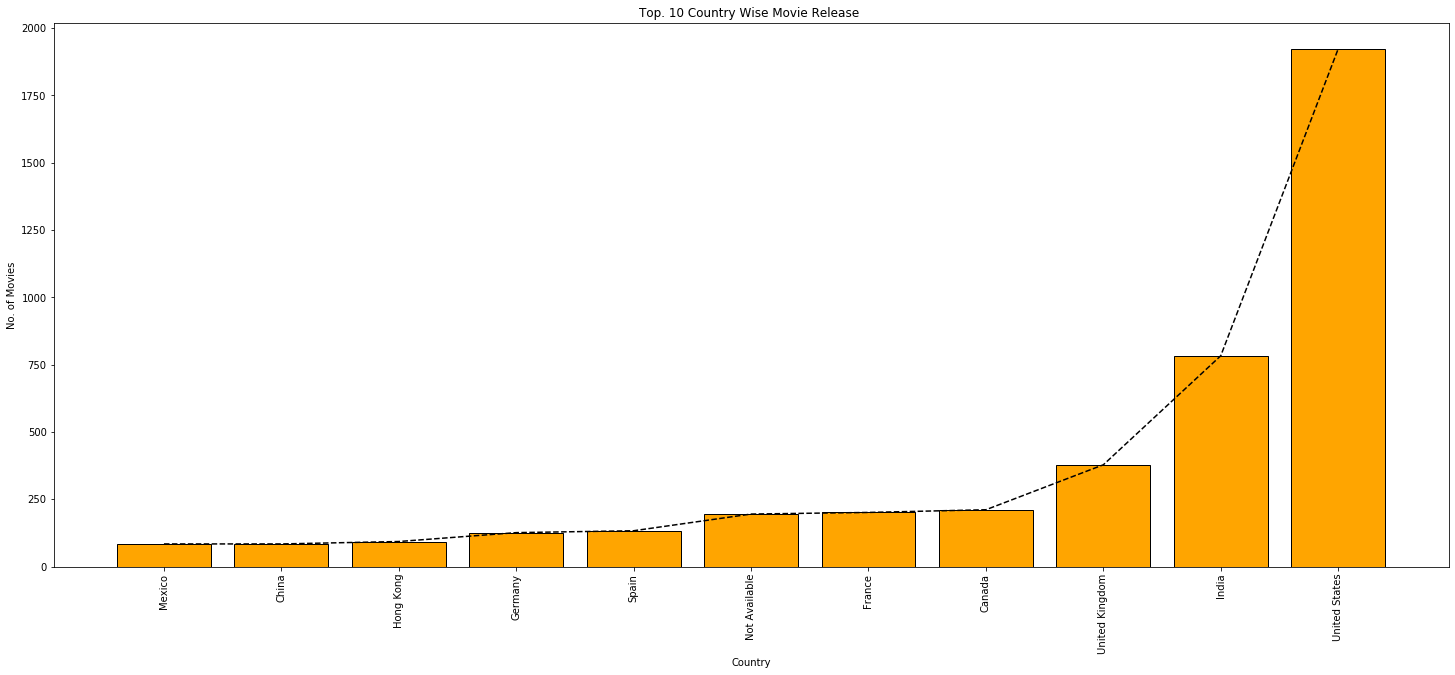

In [16]:
Cntry.reverse()
rng3.reverse()
plt.figure(figsize=(25,10))
plt.bar(Cntry,rng3,color='orange',edgecolor='black')
plt.plot(Cntry,rng3,color='black',linestyle='--')
plt.xticks(rotation=90)
plt.title("Top. 10 Country Wise Movie Release ")
plt.ylabel('No. of Movies')
plt.xlabel('Country')

Text(0.5, 0, 'Country')

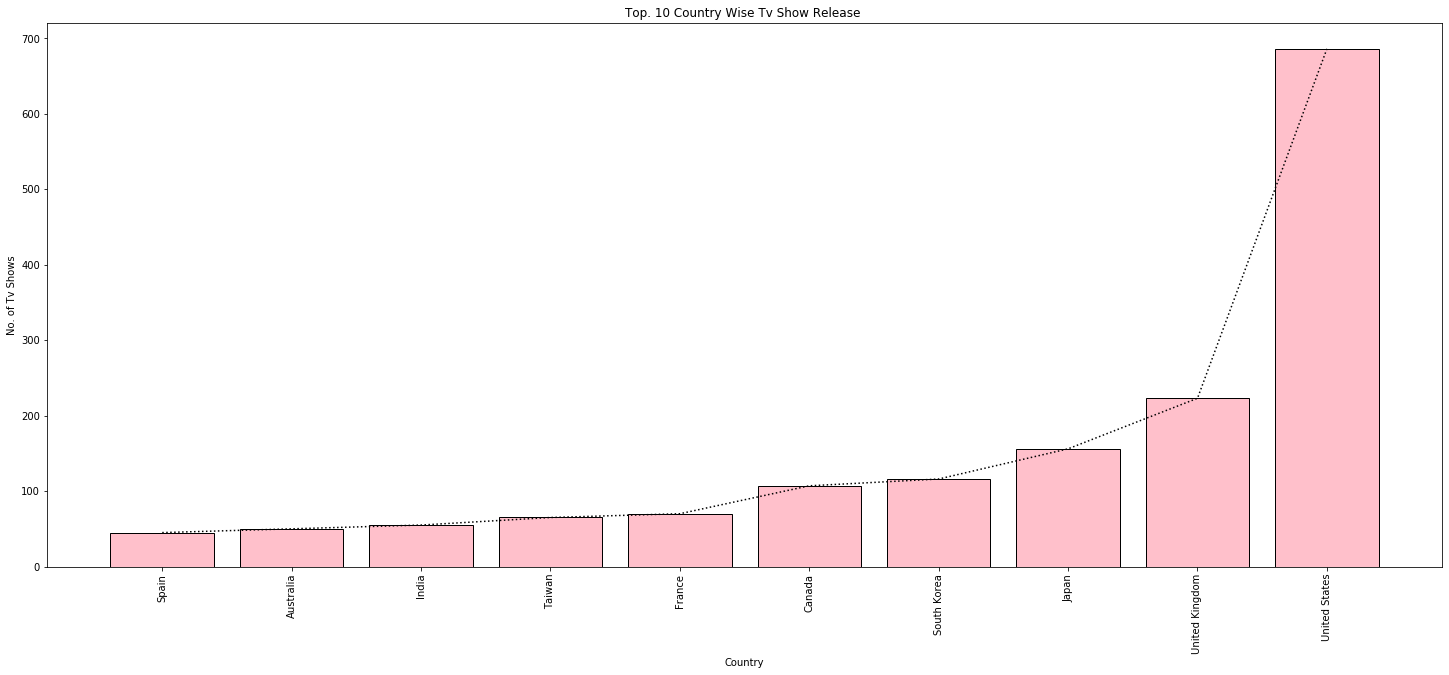

In [17]:
cnt_country1 = Counter()
for item in df_tv['country']:
    cnt_country1.update(str(item).split(", "))
#print(cnt_country)
Cntry1=[]
rng4 =[]
for response in cnt_country1.most_common(11):
    Cntry1.append(response[0])
    rng4.append(response[1])
Cntry1.remove('Not Available')
rng4.remove(281)
#Cntry= Cntry.reverse()
#rng3 = rng3.reverse
#print(Cntry1,rng4)

Cntry1.reverse()
rng4.reverse()
plt.figure(figsize=(25,10))
plt.bar(Cntry1,rng4,color='pink',edgecolor='black')
plt.plot(Cntry1,rng4,color='black',linestyle ='dotted')
plt.xticks(rotation=90)
plt.title("Top. 10 Country Wise Tv Show Release ")
plt.ylabel('No. of Tv Shows')
plt.xlabel('Country')

In [18]:
df_m.columns

Index(['show_id', 'type', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Duration', 'min/Season'],
      dtype='object')

In [19]:
list_cnt = Counter()
for item in df_m['listed_in']:
    list_cnt.update(str(item).split(', '))
list_cnt

Counter({'Children & Family Movies': 378,
         'Comedies': 1113,
         'Stand-Up Comedy': 281,
         'International Movies': 1927,
         'Sci-Fi & Fantasy': 193,
         'Thrillers': 392,
         'Action & Adventure': 597,
         'Dramas': 1623,
         'Cult Movies': 55,
         'Independent Movies': 552,
         'Romantic Movies': 376,
         'Documentaries': 668,
         'Horror Movies': 262,
         'Music & Musicals': 243,
         'Anime Features': 45,
         'Faith & Spirituality': 47,
         'LGBTQ Movies': 60,
         'Movies': 56,
         'Classic Movies': 84,
         'Sports Movies': 157})

In [20]:
Genre = []
Numb = []
for response in list_cnt.most_common():
    Genre.append(response[0])
    Numb.append(response[1])
Genre

['International Movies',
 'Dramas',
 'Comedies',
 'Documentaries',
 'Action & Adventure',
 'Independent Movies',
 'Thrillers',
 'Children & Family Movies',
 'Romantic Movies',
 'Stand-Up Comedy',
 'Horror Movies',
 'Music & Musicals',
 'Sci-Fi & Fantasy',
 'Sports Movies',
 'Classic Movies',
 'LGBTQ Movies',
 'Movies',
 'Cult Movies',
 'Faith & Spirituality',
 'Anime Features']

Text(0.5, 1.0, 'Top 10 Genre wise Movie Share')

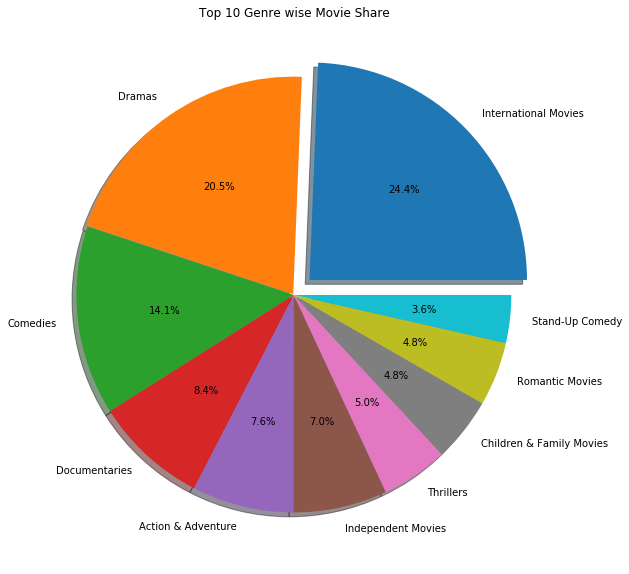

In [21]:
plt.figure(figsize=(10,10))
plt.pie(Numb[0:10], labels = Genre[0:10], explode= [0.1,0.005,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.title('Top 10 Genre wise Movie Share')


Text(0.5, 1.0, 'Top 10 Genre wise Tv Share')

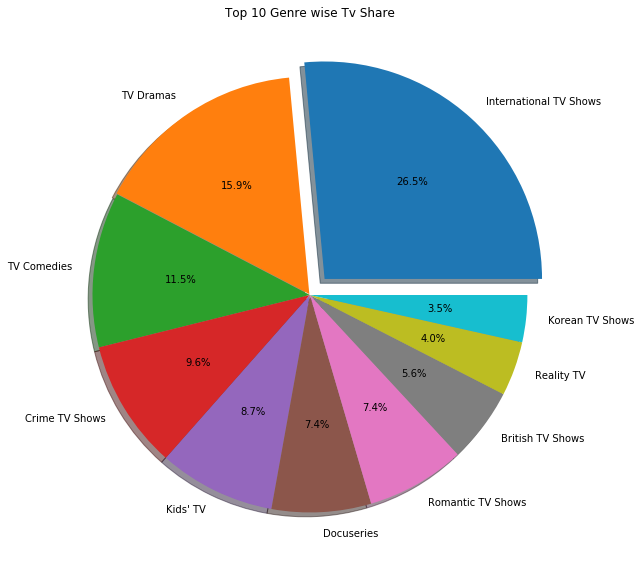

In [22]:
list_cnt = Counter()
for item in df_tv['listed_in']:
    list_cnt.update(str(item).split(', '))
list_cnt
Genre = []
Numb = []
for response in list_cnt.most_common():
    Genre.append(response[0])
    Numb.append(response[1])

plt.figure(figsize=(10,10))
plt.pie(Numb[0:10], labels = Genre[0:10], explode= [0.1,0.005,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.title('Top 10 Genre wise Tv Share')

In [23]:
Mv = df_m.groupby('country')['release_year'].value_counts()
Tv = df_tv.groupby('country')['release_year'].value_counts()
Mv
#Mv.unstack.plot(level=0).plot(kind='line', subplots=True, figsize=(10,25))

country       release_year
Argentina     2018            8
              2016            6
              2019            4
              2015            2
              2017            2
                             ..
Vietnam       2014            1
              2015            1
              2016            1
              2019            1
West Germany  1977            1
Name: release_year, Length: 1110, dtype: int64

In [24]:
df.columns

Index(['show_id', 'type', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Duration', 'min/Season'],
      dtype='object')

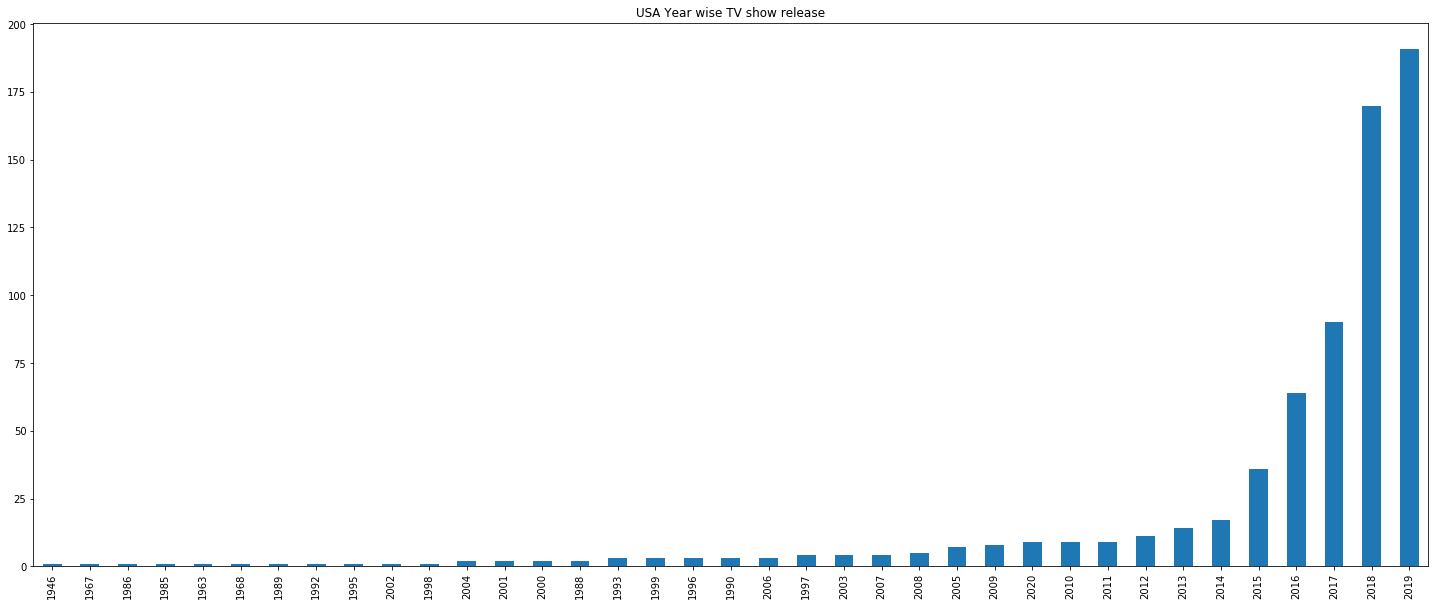

Text(0.5, 1.0, 'USA Year wise movie release')

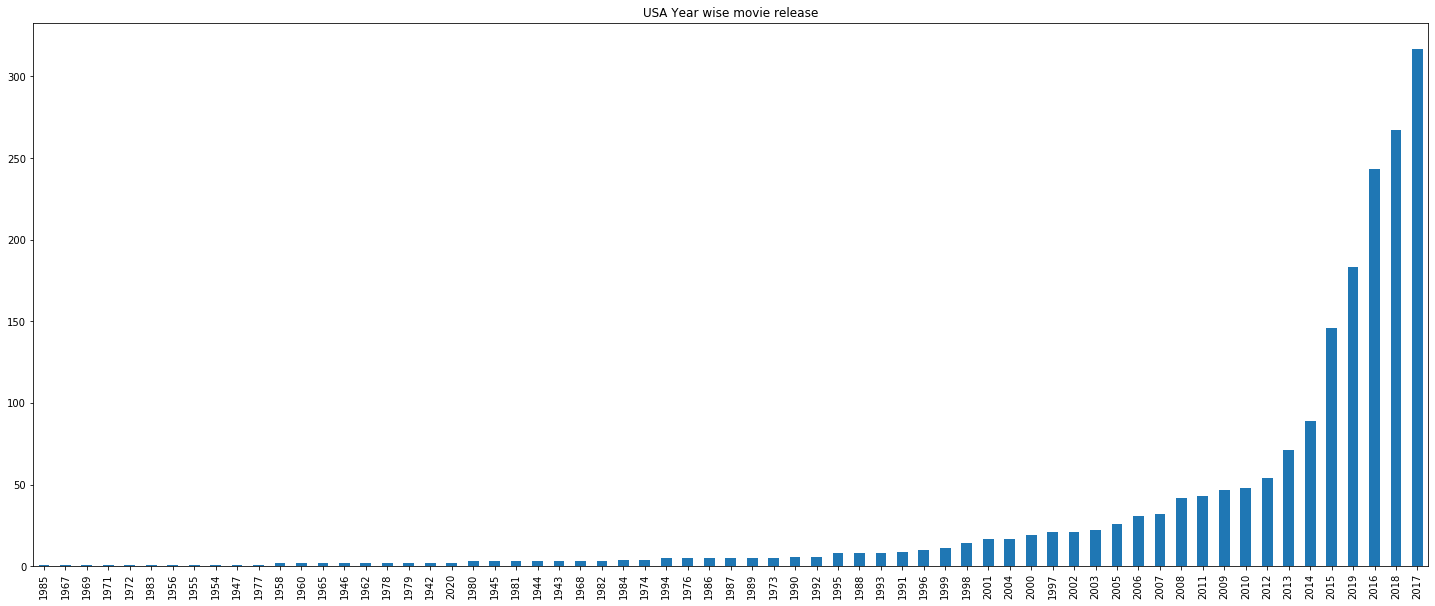

In [52]:
cntr= ['United States','India']
USA_mv = df_m[df_m['country'].str.contains('United States')]['release_year'].value_counts().sort_values(ascending=True)
USA_tv = df_tv[df_tv['country'].str.contains('United States')]['release_year'].value_counts().sort_values(ascending=True)
USA_tv.plot.bar(figsize=(25,10))
plt.title('USA Year wise TV show release')
plt.show()
USA_mv.plot.bar(figsize=(25,10))
plt.title('USA Year wise movie release')

In [ ]:
USA_mv = df_tv[df_m['country'].str.contains('United States')]['release_year'].value_counts().sort_values(ascending=True)
USA_mv
USA_tv = df_tv[df_m['country'].str.contains('United States')]['release_year'].sort_values(ascending=True).value_counts()
USA_mv.plot.bar(figsize=(25,10))
plt.title('USA Year wise movie release')
plt.show()
USA_mv.plot.bar(figsize=(25,10),log=True)
plt.title('USA Year wise movie release')